# Multilayer perceptron (MLP)
## Regression

In [91]:
import pandas as pd
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [92]:
%matplotlib inline
sns.set_theme(context='notebook', style='whitegrid')

#### Funktionen zum Ploten der Trainingsergebnisse

In [93]:
def plot_results(epochs, history, metric='mean_absolute_error'):
    f, axes = plt.subplots(1,2, figsize=(12,4))

    ax = axes[0]
    sns.lineplot(x=range(epochs), y=history.history['loss'], label='Training', ax=ax)
    sns.lineplot(x=range(epochs), y=history.history['val_loss'], label='Validation', ax=ax)
    ax.set_xlabel("Epochs")
    ax.set_ylabel("Loss")

    ax = axes[1]
    sns.lineplot(x=range(epochs), y=history.history[metric], label=f'Training', ax=ax)
    sns.lineplot(x=range(epochs), y=history.history[f'val_{metric}'], label=f'Validation', ax=ax)
    ax.set_xlabel("Epochs")
    ax.set_ylabel(metric)

    f.tight_layout()
    plt.show()

## Daten einlesen

In [94]:
sales_all = pd.read_csv("../Datasets/sales_all.csv")

In [95]:
sales_all

,date,WeekdayNo,Weekday,HolidayFlag,SchoolHolidayFlag,Sales
0,2012-01-01,6,Sun,True,True,117.0
1,2012-01-02,0,Mon,False,True,106.0
2,2012-01-03,1,Tue,False,True,82.0
3,2012-01-04,2,Wed,False,True,70.0
4,2012-01-05,3,Thur,False,True,84.0
...,...,...,...,...,...,...
1918,2017-04-02,6,Sun,False,False,107.0
1919,2017-04-03,0,Mon,False,False,113.0
1920,2017-04-04,1,Tue,False,False,87.0
1921,2017-04-05,2,Wed,False,False,69.0


## Plot

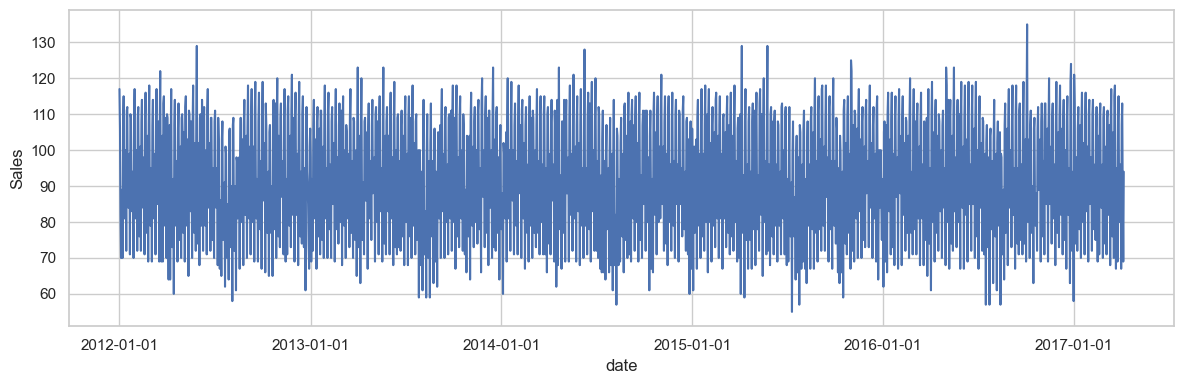

In [96]:
x_ticks = ['2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01']

f = plt.figure(figsize=(12, 4))

g = sns.lineplot(data=sales_all, x="date", y="Sales")
g.set_xticks(x_ticks)

f.tight_layout()
plt.show()

Wandeln Sie die Boolschen Features SchoolHoliday und Holiday in numerische Features um. Tipp: Benutzen Sie den LabelEncoder aus dem Vorschau Notebook dafür.

In [97]:
label_encoder_holiday = LabelEncoder()
label_encoder_school = LabelEncoder()
sales_all.iloc[:,3] = label_encoder_holiday.fit_transform(sales_all.loc[:, 'HolidayFlag'])
sales_all.iloc[:,4] = label_encoder_school.fit_transform(sales_all.loc[:, 'SchoolHolidayFlag'])

In [98]:
sales_all

,date,WeekdayNo,Weekday,HolidayFlag,SchoolHolidayFlag,Sales
0,2012-01-01,6,Sun,1,1,117.0
1,2012-01-02,0,Mon,0,1,106.0
2,2012-01-03,1,Tue,0,1,82.0
3,2012-01-04,2,Wed,0,1,70.0
4,2012-01-05,3,Thur,0,1,84.0
...,...,...,...,...,...,...
1918,2017-04-02,6,Sun,0,0,107.0
1919,2017-04-03,0,Mon,0,0,113.0
1920,2017-04-04,1,Tue,0,0,87.0
1921,2017-04-05,2,Wed,0,0,69.0


## Datenvorverarbeitung (Data preprocessing)

Wandeln Sie die kategorischen Features in numerische Features um, mithilfe von One-Hot-Encoding und weißen Sie Features der Variable X und target der Variable y zu. Tipp: pd.get_dummies()

In [99]:
X = pd.get_dummies(sales_all.loc[:, 'WeekdayNo': 'SchoolHolidayFlag'])
y = sales_all.Sales

In [100]:
X.head()

,WeekdayNo,HolidayFlag,SchoolHolidayFlag,Weekday_Fri,Weekday_Mon,Weekday_Sat,Weekday_Sun,Weekday_Thur,Weekday_Tue,Weekday_Wed
0,6,1,1,0,0,0,1,0,0,0
1,0,0,1,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,1,0
3,2,0,1,0,0,0,0,0,0,1
4,3,0,1,0,0,0,0,1,0,0


In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Bilden Sie nun ein Sequentielles Modell mit 1 Input-Layer, 2 Hidden-Layern und 1 Output-Layer.

## Modell training

In [102]:
model = keras.models.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(1, activation='linear')
])

In [103]:
LR = 5e-4
BATCHSIZE = 32
EPOCHS = 30

In [104]:
model.compile(
    optimizer=keras.optimizers.SGD(learning_rate=LR),   ## SGD = Stochastic Gradient Descent
    loss=keras.losses.MeanSquaredError(),               ## Wird als Metrik für das Netzwerk verwendet um Error zu berechnen
    metrics=keras.losses.MeanAbsoluteError(),           ## Nur für Monitoring, intern wird nichts mit diesem Wert gemacht
)

In [105]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                110       
                                                                 
 dense_13 (Dense)            (None, 10)                110       
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 231
Trainable params: 231
Non-trainable params: 0
_________________________________________________________________


In [106]:
history = model.fit(x=X_train, y=y_train, batch_size=BATCHSIZE, epochs=EPOCHS, validation_split=0.2)

Epoch 1/30
39/39 [==============================] - 0s 3ms/step - loss: 3600.5667 - mean_absolute_error: 50.6677 - val_loss: 347.5702 - val_mean_absolute_error: 15.8556
Epoch 2/30
39/39 [==============================] - 0s 2ms/step - loss: 1221.6077 - mean_absolute_error: 28.2291 - val_loss: 397.7773 - val_mean_absolute_error: 18.2722
Epoch 3/30
39/39 [==============================] - 0s 2ms/step - loss: 807.0187 - mean_absolute_error: 23.3695 - val_loss: 190.8054 - val_mean_absolute_error: 11.1860
Epoch 4/30
39/39 [==============================] - 0s 2ms/step - loss: 531.7405 - mean_absolute_error: 20.7455 - val_loss: 492.3105 - val_mean_absolute_error: 21.7161
Epoch 5/30
39/39 [==============================] - 0s 2ms/step - loss: 483.2664 - mean_absolute_error: 19.3536 - val_loss: 1198.8744 - val_mean_absolute_error: 32.6830
Epoch 6/30
39/39 [==============================] - 0s 2ms/step - loss: 378.0843 - mean_absolute_error: 17.4710 - val_loss: 124.0378 - val_mean_absolute_erro

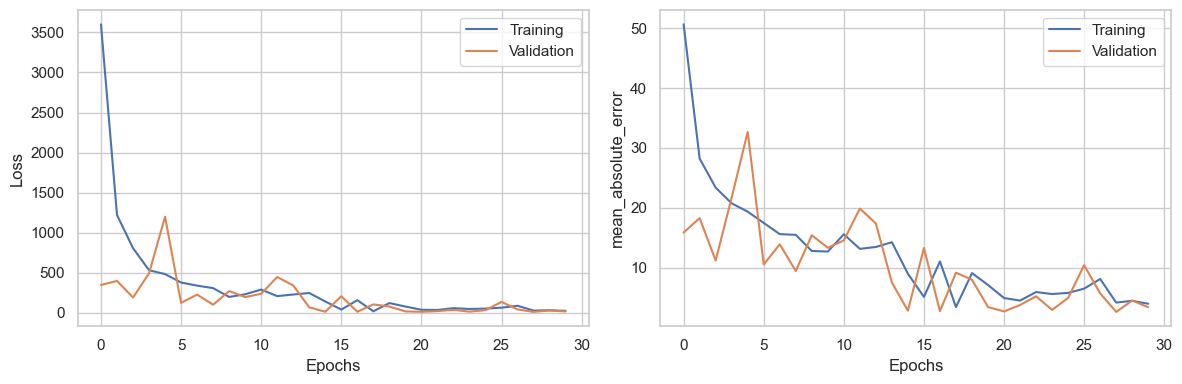

In [107]:
plot_results(EPOCHS, history)

## Modell evaluation

Schauen Sie sich die Evaluierung Ihrer Testdaten an und geben Sie eine kurze Beurteilung ab

In [108]:
model.evaluate(X_test,y_test)

13/13 [==============================] - 0s 886us/step - loss: 17.7845 - mean_absolute_error: 3.5373


[17.7845401763916, 3.537294864654541]